In [1]:
%matplotlib inline
from __future__ import print_function, unicode_literals
import sys, os 

In [2]:
from pygaarst import raster
sys.path.append("../firedetection/")
import viirstools as vt

In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import seaborn as sns

In [14]:
basepath = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/Landsat/'
landsatpaths = [
    ('L8 OLI_TIRS Sockeye/LC80700172015166LGN00', "2015 Willow", True, 't'),
    ('L8 OLI_TIRS Eagle/LC8065014_15_2015147_clip', "2015 Eagle", False, 't'), 
    ('L8 OLI_TIRS 20150706/LC80730142015187LGN00', "2015 Yukon-Koyukuk", True, 'b'),     
    ('L8 OLI_TIRS AK 2016/LC80740132016197LGN00', "2016 Northern Koyukuk", True, 't'),     
]

In [6]:
def draw_poly_on_map(lats, lons, m, ax):
    x, y = m(lons, lats)
    xy = zip(x, y)
    poly = Polygon(xy, facecolor='maroon', zorder=10)
    ax.add_patch(poly)

In [18]:
productdir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/rasterout/'

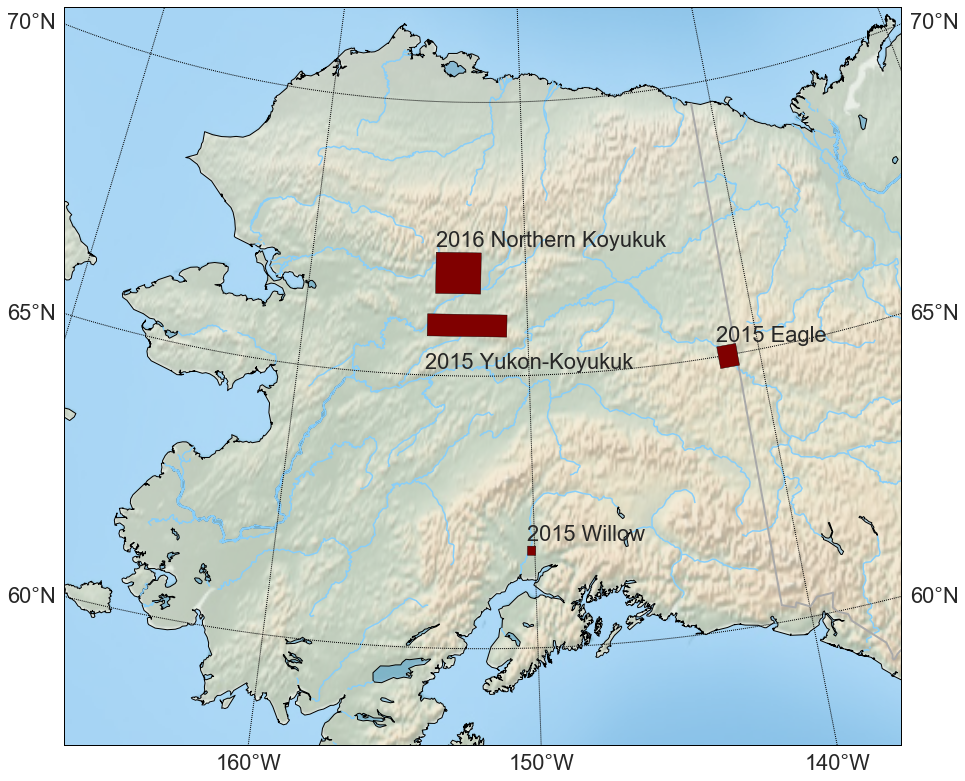

In [22]:
SAVEFIG = False
sns.set_context("talk", font_scale=1.4)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.grid(False) 
mm = vt.generate_overviewbase(
    resolution='i',
#    continentcolor=None,
    width=1700000, 
    height=1500000, 
    lon_0=-152,
    lat_1=67,
    meridianrange=np.arange(-180, 180, 10),
    parallelrange=np.arange(0, 80, 5)
)
mm.drawcountries(linewidth=2, color="darkgrey", zorder=10)
mm.shadedrelief(zorder=1, alpha=0.5)
for path, casename, clipflag, pos in landsatpaths:
    landsat = raster.Landsatscene(os.path.join(basepath, path))
    if clipflag:
        landsat.infix = '_clip'
    testband = landsat.band1
    latbounds = [testband.Lat[0, 0], testband.Lat[-1, 0], testband.Lat[-1, -1], testband.Lat[0, -1]]
    lonbounds = [testband.Lon[0, 0], testband.Lon[-1, 0], testband.Lon[-1, -1], testband.Lon[0, -1]]
    draw_poly_on_map(latbounds, lonbounds, mm, ax1)
    if pos == 't':
        x2, y2 = mm(testband.Lon[-1, 0], testband.Lat[-1, 0]+0.1)
    else: 
        x2, y2 = mm(testband.Lon[-1, 0], testband.Lat[-1, 0]-1.0)        
    plt.text(x2, y2, casename, zorder=10)

In [20]:
os.path.isdir(os.u'../Landsat/')

False

In [23]:
outfn = 'Fig01_LR.png'
fig1.savefig(os.path.join(productdir, outfn), dpi=150, bb_inches='tight')

In [24]:
outfn = 'Fig01.png'
fig1.savefig(os.path.join(productdir, outfn), dpi=300, bb_inches='tight')

In [19]:
outfn = 'Fig01.tif'
fig1.savefig(os.path.join(productdir, outfn), dpi=300, bb_inches='tight')